<a href="https://colab.research.google.com/github/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Final_Notebook_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Yelp's dataset to help PA restaurants identify areas of improvement in Service or Food Quality. 

# Business problem
________________________

Yelp reviews can come in handy for a variety of reasons, for instance identifying key nouns and adjectives can help resturant owners and investors can bring clarity to investors. In our business case, we are interested in identifying nouns related to service or food - in hopes that we can start identifying statements that can improve either hospitality or food quality. Together these two are the ingredients for a successful resturant that we aim to look at for our stakeholders

# Stakeholders
_______________________

The stake holder would be someone who has multiple restaurants in Philadelphia and they want to identify which aspects of their business (service or food quality) to improve first based on yelp reviews and other attributes in order to obtain higher star ratings.

Data

#EDA 
______________
For this project we will be utilizing yelp's dataset which can be found here: https://www.yelp.com/dataset/download. This dataset is provided by yelp and contains 5 different JSON files.

The first is buisness

it contains: the id of the buisness, business name, address, city, state, postal code, lat, long, stars, review count, is it open?, attributes, categories, and hours

For this first one we will be utilizing all features. except some locational attributes name, address, state, postal code. Some attributes are of usage to us, categories needs to be .exploded() in order to obtain resturants and establisments related to food. Hours can be generated. 

Please refer to Notebook 3 for the full code for: final_pre_processed_data, a json file that combines business and the "review.json"

The second one is review.json 

It contains review id, user id, business id, stars, date, text, useful, funny and cool (the latter 3 being # of votes received by other consumers). We will only be interested in user_id, buisness id_, stars, and text. 

The third one is users: we will not have time to explode this 

The fourth one is checkin.json we will not have time to explode this 

The fifth one is tip.json
This one is important because it represents an abbreviated form of review, we are interested in seeing how this works and have explored that tips do not work as well as the full text from a ML perspective.

 

## Preprocessing the data:
____________
Final_preprocessed_data.json is the merge of business.json and reviews that have their entities extracted. The rows populated are PA restaurants only.

EDA.JSON is the same as final_preprocessed_data except without entities and other NLP tasks. It is for feature engineering.

In [1]:
#import pandas and mount drive 

import pandas as pd
import json
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
#change directory
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
#json is listed as preprocessed 3 which progresses differently in notebook 2
import json
preprocessed3 = pd.read_json('/content/gdrive/MyDrive/final_preprocessed_data.json', encoding='utf8') 

In [4]:
#please refer to notebook 2 for obtaining these entitites 
preprocessed3['entities']

0        (S\n  nice/JJ\n  little/JJ\n  bakery/JJ\n  hea...
1        (S\n  bakery/NN\n  usually/RB\n  go/VBP\n  chi...
2        (S\n  delightful/JJ\n  find/VBP\n  chinatown/J...
3        (S\n  order/NN\n  graduation/NN\n  cake/VB\n  ...
4        (S\n  hkstyle/JJ\n  milk/NN\n  tea/IN\n  four/...
                               ...                        
67359    (S\n  cute/JJ\n  coffee/NN\n  shop/NN\n  aroun...
67360    (S\n  nice/JJ\n  cash/NN\n  coffee/NN\n  spot/...
67361    (S\n  hand/NN\n  best/JJS\n  ice/NN\n  coffee/...
67362    (S\n  place/NN\n  great/JJ\n  super/JJ\n  chil...
67363    (S\n  neighborhood/NN\n  gem/NN\n  owner/NN\n ...
Name: entities, Length: 65698, dtype: object

In [5]:
practice_set= preprocessed3
practice_set.head()

,business_id,stars_x,review_count,ByAppointmentOnly,BusinessAcceptsCreditCards,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,...,stars_y,text,total_hours,weekend_hours,distance_to_lowest_star,text_refurbished,entities,extract_nouns,extract_adjectives,nouns_adjec
0,MTSW4McQd7CbVtyjqoe9mw,4.0,80,False,False,unknown,True,False,True,u'free',...,4,This is nice little Chinese bakery in the hear...,94.0,42.0,987.992116,nice little bakery heart philadelphia chinatow...,(S\n nice/JJ\n little/JJ\n bakery/JJ\n hea...,"'heart', 'philadelphia', 'female', 'cashier', ...","'nice', 'little', 'bakery', 'chinatown', 'flir...","'heart', 'philadelphia', 'female', 'cashier', ..."
1,MTSW4McQd7CbVtyjqoe9mw,4.0,80,False,False,unknown,True,False,True,u'free',...,4,This is the bakery I usually go to in Chinatow...,94.0,42.0,987.992116,bakery usually go chinatown decent variety bun...,(S\n bakery/NN\n usually/RB\n go/VBP\n chi...,"'bakery', 'variety', 'bun', 'pastry', 'bun', '...","'chinatown', 'decent', 'beanfilled', 'bun', 'f...","'bakery', 'variety', 'bun', 'pastry', 'bun', '..."
2,MTSW4McQd7CbVtyjqoe9mw,4.0,80,False,False,unknown,True,False,True,u'free',...,5,"A delightful find in Chinatown! Very clean, an...",94.0,42.0,987.992116,delightful find chinatown clean kind service e...,(S\n delightful/JJ\n find/VBP\n chinatown/J...,"'kind', 'service', 'everyone', 'treat', 'treat...","'delightful', 'chinatown', 'clean', 'happy', '...","'kind', 'service', 'everyone', 'treat', 'treat..."
3,MTSW4McQd7CbVtyjqoe9mw,4.0,80,False,False,unknown,True,False,True,u'free',...,5,I ordered a graduation cake for my niece and i...,94.0,42.0,987.992116,order graduation cake niece come absolutely pe...,(S\n order/NN\n graduation/NN\n cake/VB\n ...,"'order', 'graduation', 'event', 'staff', 'nice'","'niece', 'perfect', 'come', 'future', 'good'","'order', 'graduation', 'event', 'staff', 'nice..."
4,MTSW4McQd7CbVtyjqoe9mw,4.0,80,False,False,unknown,True,False,True,u'free',...,4,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,94.0,42.0,987.992116,hkstyle milk tea four stars\n\nnot quite sure ...,(S\n hkstyle/JJ\n milk/NN\n tea/IN\n four/...,"'milk', 'saint', 'honore', 'pastry', 'business...","'hkstyle', 'sure', 'memorable', 'decide', 'wat...","'milk', 'saint', 'honore', 'pastry', 'business..."


In [7]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.7 MB/s eta 0:00:00


In [8]:
preprocessed3.nouns_adjec =preprocessed3.nouns_adjec.astype(str)


In [9]:
#get vader sentiment analysis going to cross compare 


def sentiment_scores(sentence):

    #The sentimentintensity analyzer classifier is used to rate the polarity of the sentance from highly negative to highly positive

    sid_obj = SentimentIntensityAnalyzer()
    #obtain sentance and find the score via the polarity_score fx 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    #if compound = 0 then it is neutral, -1 = negative, + 1 positive. the value we assign to compound/positive/negative is beyond the scope of this project.
    #if rated at least 10% positive then it is positive and the same for negative, anywhere in between and it's neutral.

    if sentiment_dict['compound'] >= 0.1 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.1 :
        return "Negative"
 
    else :
        return "Neutral"

preprocessed3['vader_nouns_adjecs']= preprocessed3['nouns_adjec'].map(sentiment_scores)

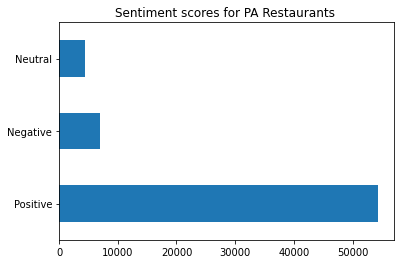

In [11]:
import matplotlib.pyplot as plt
preprocessed3['vader_nouns_adjecs'].value_counts().plot(kind='barh')
ax = plt.title("Vader Score for Nouns and Adjectives")


ax = plt.title("Sentiment scores for PA Restaurants ")

plt.show()



In [ ]:
#this dataset is business data except with the attributes exploded and only resturants/food places in PA are listed
EDA = pd.read_csv('/content/gdrive/MyDrive/EDA.csv', encoding='utf8')
EDA

In [13]:
EDA = EDA.dropna(subset=['stars_y'])

In [29]:
EDA.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,Wednesday,Thursday,Friday,Saturday,Sunday,establishment_type,stars_y,text,user_id,weekend_hours
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,...,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0,Restaurants,4.0,This is nice little Chinese bakery in the hear...,6_SpY41LIHZuIaiDs5FMKA,42.0
1,1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,...,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0,Restaurants,4.0,This is the bakery I usually go to in Chinatow...,tCXElwhzekJEH6QJe3xs7Q,42.0
2,2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,...,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0,Restaurants,5.0,"A delightful find in Chinatown! Very clean, an...",WqfKtI-aGMmvbA9pPUxNQQ,42.0
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,...,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0,Restaurants,5.0,I ordered a graduation cake for my niece and i...,3-1va0IQfK-9tUMzfHWfTA,42.0
4,4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,...,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0,Restaurants,4.0,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,EouCKoDfzaVG0klEgdDvCQ,42.0


In [15]:
EDA.Tuesday.value_counts()
#fill the na this time with really low time differences like 30 minutes 
#still doesnt cut out the 0 but at least it gives us smaller hours 
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
EDA[days] = EDA[days].astype(str)
EDA[days] = EDA[days].fillna('1:0-1:30')


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:


def calculate_hours(row: pd.Series) -> float:
    """The point of this function is to take the row which is the format "x:y-a:b"
    and x:y is the opening time and a:b is the closing time
    then we seperate x and a and y and b  into opening/closing time respectively
    we finally make it that if start hour = to end hour then it returns 0 for the closed resturants. we can aslo assume that we would want our resturant to be open for more than 12 hours.
    """
    try:
        # split the given times to start and end time
        opening_time, closing_time = row.split("-")
        # split hours and minutes
        start_hour, start_minute = opening_time.split(":")
        end_hour, end_minute = closing_time.split(":")
        # calculate start time (in hours)
        start_time = float(start_hour) + float(start_minute) / 60
        # calculate end time (in hours)
        end_time = float(end_hour) + float(end_minute) / 60
        # handle overneight and 24h openings
        if start_time >= end_time:
            end_time += 24
        # return the duration from start time to end time
        return end_time - start_time
        
    except:
        return 0.0


In [31]:
#get weekend hours
EDA["weekend_hours"]=  EDA["Friday"].apply(calculate_hours) +\
             EDA["Saturday"].apply(calculate_hours) +\
             EDA["Sunday"].apply(calculate_hours)

<ipython-input-31-715f15b76764>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA["weekend_hours"]=  EDA["Friday"].apply(calculate_hours) +\


In [32]:
#the function didnt account for 00;00- 00;00 and reads as 24 so we can replace 24,48,72 with 0 hours 

EDA["weekend_hours"] = EDA["weekend_hours"].astype(str).replace('72.0', '0')

EDA["weekend_hours"] = EDA["weekend_hours"].astype(str).replace('72.00', '0')
EDA["weekend_hours"] = EDA["weekend_hours"].astype(str).replace('48.00', '0')

<ipython-input-32-514edfa983d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA["weekend_hours"] = EDA["weekend_hours"].astype(str).replace('72.0', '0')
<ipython-input-32-514edfa983d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA["weekend_hours"] = EDA["weekend_hours"].astype(str).replace('72.00', '0')
<ipython-input-32-514edfa983d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [33]:
EDA['weekend_hours'] = EDA['weekend_hours'].astype(float)

<ipython-input-33-d17c9f2452ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA['weekend_hours'] = EDA['weekend_hours'].astype(float)


<ipython-input-34-b1b9c3444545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA['stars_y']=  EDA['stars_y'].astype(float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


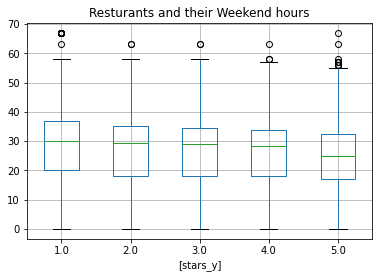

In [34]:
#obtain weekend hours
import matplotlib.pyplot as plt
EDA['stars_y']=  EDA['stars_y'].astype(float)
ax= EDA.boxplot(column=['weekend_hours'], by = ['stars_y'])
plt.title("Resturants and their Weekend hours")
plt.suptitle('')

plt.show()


In [ ]:
#simple OLS model to see if theres any linear correlation 

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = preprocessed3['stars_y']
X = preprocessed3[['weekend_hours']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

print("_____________________________")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                            OLS Regression Results                            
Dep. Variable:                stars_y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1196.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):          1.22e-259
Time:                        06:11:17   Log-Likelihood:            -1.0975e+05
No. Observations:               65698   AIC:                         2.195e+05
Df Residuals:                   65696   BIC:                         2.195e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2474      0.013    328.770

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Since there is no correlation we know that a NN is preferred..

In [35]:
#start creating our Neural net
practice_set= practice_set[['nouns_adjec', 'stars_y']]

In [36]:
practice_set

,nouns_adjec,stars_y
0,"'heart', 'philadelphia', 'female', 'cashier', ...",4
1,"'bakery', 'variety', 'bun', 'pastry', 'bun', '...",4
2,"'kind', 'service', 'everyone', 'treat', 'treat...",5
3,"'order', 'graduation', 'event', 'staff', 'nice...",5
4,"'milk', 'saint', 'honore', 'pastry', 'business...",4
...,...,...
67359,"'coffee', 'shop', 'work', 'price', 'variety', ...",5
67360,"'cash', 'coffee', 'spot', 'cozy', 'spot', 'cof...",3
67361,"'hand', 'ice', 'coffee', 'terrific', 'guy', 'c...",5
67362,"'place', 'chill', 'corner', 'coffee', 'shop', ...",5


In [37]:
#idea from https://www.youtube.com/watch?v=Fuw0wv3X-0o
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [38]:
#convert
practice_set['nouns_adjec']= practice_set['nouns_adjec'].astype(str)

<ipython-input-38-5f837cc53c80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_set['nouns_adjec']= practice_set['nouns_adjec'].astype(str)


In [39]:
pd.set_option("max_colwidth", None)

In [40]:
practice_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65698 entries, 0 to 67363
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nouns_adjec  65698 non-null  object
 1   stars_y      65698 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
practice_set['nouns_adjec']

0                                                                                                                                                                                                                                                'heart', 'philadelphia', 'female', 'cashier', 'pastry', 'show', 'display', 'case', 'evening', 'sesame', 'ball', 'paste', 'rice', 'ball', 'bai', 'tang', 'gao', 'area''nice', 'little', 'bakery', 'chinatown', 'flirtatious', 'adorn', 'fill', 'bean', 'glutinous', 'similar', 'place', 'worth'
1                                                                                                                                                                         'bakery', 'variety', 'bun', 'pastry', 'bun', 'mung', 'coconut', 'stuff', 'egg', 'tart', 'dozen', 'price', 'standard', 'thing', 'service', 'serve', 'coffee', 'tea', 'couple', 'group', 'guy', 'chillin', 'corner', 'debate', 'something', 'place', 'stock', 'bun', 'town''chinatown', 'decent', 'beanfilled', 

In [41]:
practice_set['nouns_adjec'] = practice_set['nouns_adjec'].astype(str).apply(lambda x: x.replace('"', ''))

<ipython-input-41-4933b39ab411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_set['nouns_adjec'] = practice_set['nouns_adjec'].astype(str).apply(lambda x: x.replace('"', ''))


In [42]:
practice_set['nouns_adjec'] = practice_set['nouns_adjec'].apply(lambda x: x.replace('[', ''))
practice_set['nouns_adjec'] = practice_set['nouns_adjec'].apply(lambda x: x.replace(']', ''))
practice_set['nouns_adjec'] = practice_set['nouns_adjec'].apply(lambda x: x.replace(',', ''))
practice_set['nouns_adjec'] =practice_set['nouns_adjec'].apply(lambda x: x.replace(", '", "'"))
practice_set['nouns_adjec'] =practice_set['nouns_adjec'].apply(lambda x: x.replace("'", ""))

<ipython-input-42-63d9651a53b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_set['nouns_adjec'] = practice_set['nouns_adjec'].apply(lambda x: x.replace('[', ''))
<ipython-input-42-63d9651a53b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_set['nouns_adjec'] = practice_set['nouns_adjec'].apply(lambda x: x.replace(']', ''))
<ipython-input-42-63d9651a53b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [43]:
#create the 'top' restaurants based off of the stars distribution in notebook 1 
top_rest_cv= practice_set[(practice_set['stars_y'] >= 3)]

In [44]:
top_rest_cv

,nouns_adjec,stars_y
0,heart philadelphia female cashier pastry show display case evening sesame ball paste rice ball bai tang gao areanice little bakery chinatown flirtatious adorn fill bean glutinous similar place worth,4
1,bakery variety bun pastry bun mung coconut stuff egg tart dozen price standard thing service serve coffee tea couple group guy chillin corner debate something place stock bun townchinatown decent beanfilled bun free good table old table great,4
2,kind service everyone treat treat judgement theyre favoritedelightful chinatown clean happy delicious ton sweet,5
3,order graduation event staff niceniece perfect come future good,5
4,milk saint honore pastry business boyfriend time cross mind try think year try hkstyle milk tea hook think day week milk tea sugar i zhong gang milk day ice ice etc note try crispy roast pork bun name pork bun crispy roast pork bunhkstyle sure memorable decide watch good good hkstyle certain lady enough much side wrong roast decent try,4
...,...,...
67359,coffee shop work price variety beverage cold choose selection something eatcute low nice hot seem nice,5
67360,cash coffee spot cozy spot coffee medium latte get time partnice invite pick ordered bad,3
67361,hand ice coffee terrific guy counter try apartment bella vista place vote apartment goodfreak close,5
67362,place chill corner coffee shop baristaowner neighborhood order tea afternoon jerk get anyway say day judgment pushiness pastry nothing complain chairgreat super nonpretentious friendly iced free wifi im know im cheap comfortable awesome great little comfortable much,5


Model with CV 

Text(0.5, 1.02, 'Word analysis through Count Vectorization')

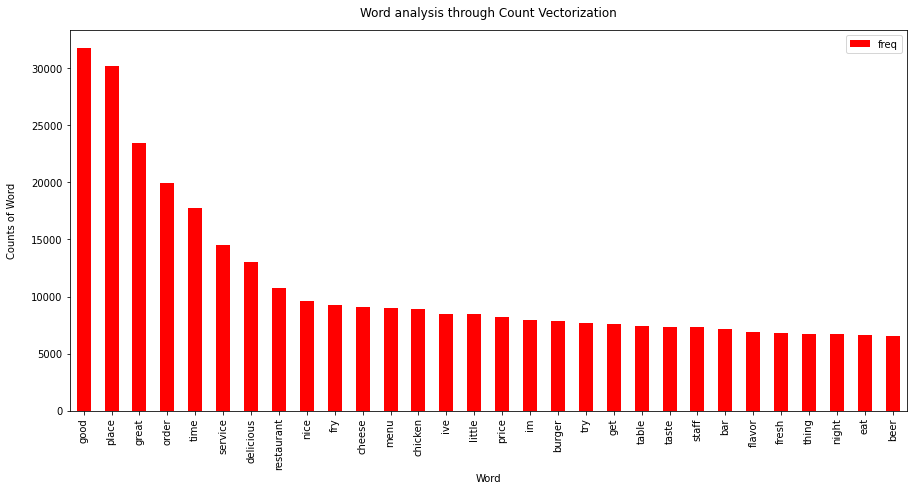

In [45]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X=None
X = top_rest_cv['nouns_adjec']


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#use iloc next time
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization", y=1.02)

In [46]:
low_rest_cv= practice_set[(practice_set['stars_y'] <= 3)]

Text(0.5, 1.02, 'Word analysis through Count Vectorization')

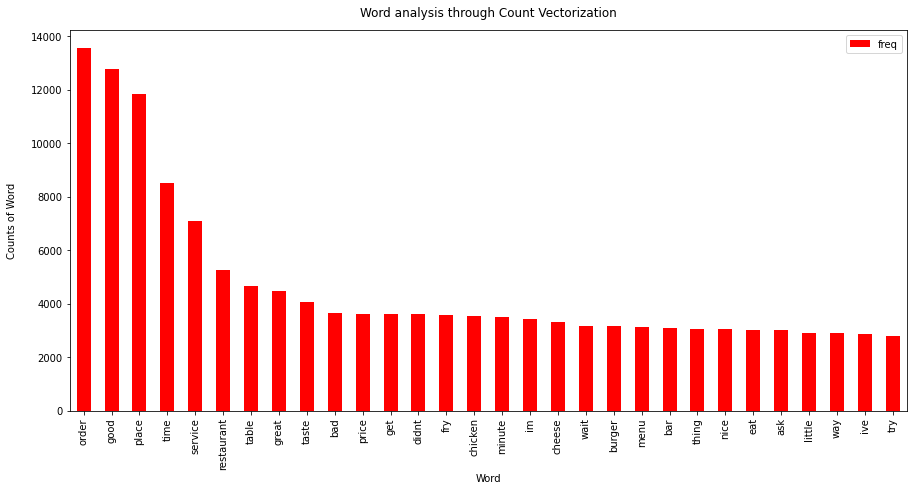

In [47]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X=None

sum_words= None
words_freq = None
frequency = None
X = low_rest_cv['nouns_adjec']


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#use iloc next time
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization", y=1.02)

Model with W2V

In [48]:
#import gensim
import nltk
from gensim.models import Word2Vec, KeyedVectors


In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
practice_set['nouns_adjec']

0                                                                                                                                                   heart philadelphia female cashier pastry show display case evening sesame ball paste rice ball bai tang gao areanice little bakery chinatown flirtatious adorn fill bean glutinous similar place worth
1                                                                                                       bakery variety bun pastry bun mung coconut stuff egg tart dozen price standard thing service serve coffee tea couple group guy chillin corner debate something place stock bun townchinatown decent beanfilled bun free good table old table great
2                                                                                                                                                                                                                                          kind service everyone treat treat judgement theyre favoritedelightful c

In [51]:
from nltk import word_tokenize
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
practice_set['nouns_adjec']= practice_set['nouns_adjec'].astype(str)

<ipython-input-52-7285264f639a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_set['nouns_adjec']= practice_set['nouns_adjec'].astype(str)


In [53]:
corpus =  practice_set['nouns_adjec'].map(word_tokenize)


In [54]:
corpus

0                                                                                                                                                                                  [heart, philadelphia, female, cashier, pastry, show, display, case, evening, sesame, ball, paste, rice, ball, bai, tang, gao, areanice, little, bakery, chinatown, flirtatious, adorn, fill, bean, glutinous, similar, place, worth]
1                                                                                                                             [bakery, variety, bun, pastry, bun, mung, coconut, stuff, egg, tart, dozen, price, standard, thing, service, serve, coffee, tea, couple, group, guy, chillin, corner, debate, something, place, stock, bun, townchinatown, decent, beanfilled, bun, free, good, table, old, table, great]
2                                                                                                                                                                                       

In [58]:
from gensim.models import Phrases

# Train a bigram detector.
bigram_transformer = Phrases(corpus)

# Apply the trained MWE detector to a corpus, using the result to train a Word2vec model.
bi_gram_model = Word2Vec(bigram_transformer[corpus], min_count=1)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


<ipython-input-67-df7f94ea0282>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  list_model_manager= bi_gram_model.most_similar('waiteress')


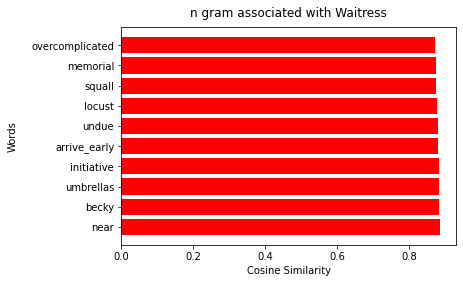

In [67]:
list_model_manager= bi_gram_model.most_similar('waiteress')
list_model_manager
word = []
frequency = []

for i in range(len(list_model_manager)):
  word.append(list_model_manager[i][0])
  frequency.append(list_model_manager[i][1])


plt.barh(word, frequency, color='r')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("n gram associated with Waitress", y=1.02)
plt.show()


In [55]:
#min count = 1 for freq 
#vectorsize = 100 
#windows = amount it will go left and right 
model = Word2Vec(corpus, size=300, min_count = 1, window = 10)

In [56]:
vocabulary = model.wv.vocab

In [68]:
#vocabulary


In [69]:
model1 = model.wv

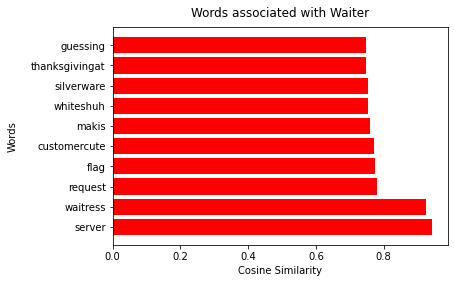

In [70]:
list_model_manager= model1.most_similar('waiter')
list_model_manager
word = []
frequency = []

for i in range(len(list_model_manager)):
  word.append(list_model_manager[i][0])
  frequency.append(list_model_manager[i][1])


plt.barh(word, frequency, color='r')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Waiter", y=1.02)
plt.show()


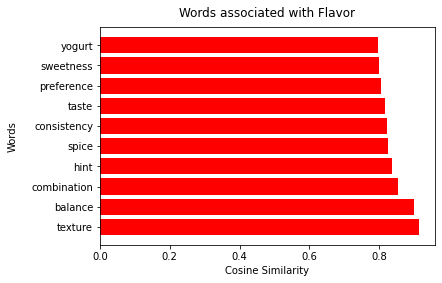

In [71]:
list_model_flavor= model1.most_similar("flavor")

word = []
frequency = []

for i in range(len(list_model_flavor)):
  word.append(list_model_flavor[i][0])
  frequency.append(list_model_flavor[i][1])


plt.barh(word, frequency, color='r')
plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Flavor", y=1.02)
plt.show()

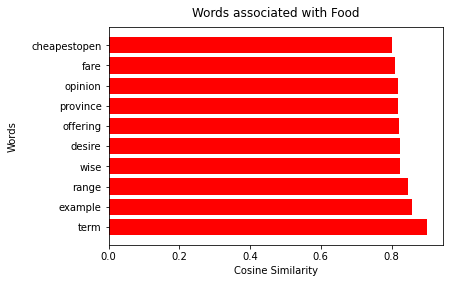

In [72]:
list_model_flavor= model1.most_similar("food")

word = []
frequency = []

for i in range(len(list_model_flavor)):
  word.append(list_model_flavor[i][0])
  frequency.append(list_model_flavor[i][1])


plt.barh(word, frequency, color='r')
plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Food", y=1.02)
plt.show()

In [73]:
for_keras= practice_set['nouns_adjec'].values

In [74]:
for_keras

array(['heart philadelphia female cashier pastry show display case evening sesame ball paste rice ball bai tang gao areanice little bakery chinatown flirtatious adorn fill bean glutinous similar place worth',
       'bakery variety bun pastry bun mung coconut stuff egg tart dozen price standard thing service serve coffee tea couple group guy chillin corner debate something place stock bun townchinatown decent beanfilled bun free good table old table great',
       'kind service everyone treat treat judgement theyre favoritedelightful chinatown clean happy delicious ton sweet',
       ...,
       'hand ice coffee terrific guy counter try apartment bella vista place vote apartment goodfreak close',
       'place chill corner coffee shop baristaowner neighborhood order tea afternoon jerk get anyway say day judgment pushiness pastry nothing complain chairgreat super nonpretentious friendly iced free wifi im know im cheap comfortable awesome great little comfortable much',
       'neighborh

In [75]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [79]:
#vocab size, one hot for keras 
vocab_size = 300
encoded_reviews = [one_hot(x, vocab_size) for x in for_keras]
print(encoded_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [80]:
max_length = 10
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[164 293 167 ... 153  76 251]
 [ 42 260  75 ... 161 204  87]
 [249 238 268 ...  82 135 181]
 ...
 [261  63  44 ...  44 152 268]
 [288 189 288 ...  30 174  94]
 [ 33 153  76 ...  98  87  82]]


In [81]:
embeded_vector_size = 5
model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length, name = "embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [82]:
practice_set.columns

Index(['nouns_adjec', 'stars_y'], dtype='object')

In [83]:
def stars_transform(x):
  if x >= 3.5:
    return 1
  else:
    return 0 


practice_set['stars_y'] = practice_set['stars_y'].apply(stars_transform)

<ipython-input-83-3b0cd9d07dc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_set['stars_y'] = practice_set['stars_y'].apply(stars_transform)


In [84]:
practice_set['stars_y'].value_counts()

1    45608
0    20090
Name: stars_y, dtype: int64

In [85]:
sentiment = practice_set['stars_y'].values.flatten()

In [86]:
X = padded_reviews
y=sentiment

In [87]:
sentiment


array([1, 1, 1, ..., 1, 1, 1])

In [88]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 5)             1500      
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(X, y, epochs=50, verbose=0)

In [90]:
loss, accuracy = model.evaluate(X,y)
accuracy

2054/2054 [==============================] - 3s 1ms/step - loss: 0.4871 - accuracy: 0.7660


0.7659746408462524

In [91]:
model.get_layer('embedding').get_weights()[0]

array([[-0.12903145,  0.03645514,  0.11620658, -0.30025154,  0.05454271],
       [ 0.10832434, -0.03827906,  0.15285577, -0.1730711 ,  0.3362035 ],
       [ 0.04614276, -0.55291986, -0.09321934, -0.09094229,  0.07947518],
       ...,
       [-0.03259981,  0.82224166, -0.49888173,  0.01189768, -0.2510604 ],
       [ 0.00980227,  0.5971864 ,  0.00493329, -0.6921804 ,  0.2917085 ],
       [ 0.5033656 ,  0.03626359,  1.1724364 , -0.17609575, -0.33060157]],
      dtype=float32)

# Discussion
Although the accuracy of the model is sub-80, actions prescribed can be validated by feeding in more data into the model. 

## Food Recommendations 

Tips are preferred compared to the full text.
The words; balance and texture appear most similar with flavor.


Some areas of flavor to explore might be spice and sweet flavors that have ‘hints’ of other ‘combinations’


Additionally, consistency with flavor appears to high in similarity scores
Waiter and Waitress show similar cosine similarity scores for certain behaviors.

## Service Recommendations

Refilling water is associated with the job, so a business recommendation may be to advise your staff to walk around with water when busy.

Another task is probably taking orders from customers, don’t overcomplicate things or arrive too early before they’ve made up their mind on their order.


